In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covidDF = pd.read_csv("covid.csv")
breastDF = pd.read_csv("breast.csv")
#Type of intervention, Eligibility, Results presented

In [131]:
#Analysis related to interventions. Start with comparisons bewtween the two datasets. 
#First, let's get all of the columns 
colList = list(breastDF.columns)
colList


['NCT Number',
 'Status',
 'Conditions',
 'Interventions',
 'Sponsor',
 'Collaborators',
 'Sex',
 'Age',
 'Phases',
 'Enrollment',
 'Funder Type',
 'Study Type',
 'Start Date',
 'Completion Date']

In [154]:
#Create a dataframe for the breast cancer dataset
breastInterventions = breastDF.copy()
#Keep only 'NCT Number', 'Status', 'Conditions', 'Interventions' columns
breastInterventions = breastInterventions[['NCT Number', 'Status', 'Conditions', 'Interventions']]
breastInterventions.head()
type(breastInterventions) 

pandas.core.frame.DataFrame

In [133]:
#Get the unique values of the 'Interventions' column
breastInterventions['Interventions'].unique()
#The intentions are delimited by '|'. For each trial, split the interventions and create a and replace the one string with a list of the delimted values. I will also create a new column that counts the number of interventions for each trial.
breastInterventions['Interventions'] = breastInterventions['Interventions'].str.split('|')
breastInterventions['Interventions Count'] = breastInterventions['Interventions'].apply(lambda x: len(x))
breastInterventions.head()


,NCT Number,Status,Conditions,Interventions,Interventions Count
0,NCT04461977,UNKNOWN,Peripheral Neuropathy Due to Chemotherapy,"[OTHER: True acupuncture, OTHER: Sham acupunct...",2
1,NCT05422794,RECRUITING,Anatomic Stage III Breast Cancer AJCC v8|Anato...,"[DRUG: BET Bromodomain Inhibitor ZEN-3694, PRO...",7
2,NCT05122494,RECRUITING,Breast Cancer,"[DRUG: Hemay022+AI, DRUG: Lapatinib+Capecitabine]",2
3,NCT05000294,SUSPENDED,Bile Duct Cancer|Gall Bladder Cancer|Breast Ca...,"[DRUG: Atezolizumab, DRUG: Tivozanib]",2
4,NCT05134194,UNKNOWN,Triple Negative Breast Cancer,[DRUG: Camrelizumabã€Capecitabine/eribulin/ge...,2


In [134]:
#Create a dataframe where the first column is the number of interventions and the second column is the number of trials with that number of interventions
breastInterventionsCount = breastInterventions['Interventions Count'].value_counts().reset_index()
breastInterventionsCount.columns = ['Interventions Count', 'Number of Trials']
breastInterventionsCount = breastInterventionsCount.sort_values(by = 'Interventions Count')
breastInterventionsCount


,Interventions Count,Number of Trials
0,1,1290
1,2,908
2,3,354
3,4,177
4,5,102
5,6,63
6,7,34
7,8,19
8,9,12
9,10,10


In [135]:
#Recreate that, but if there are more than 13 interventions, then put them in the 13+ category
breastInterventions['Interventions Count'] = breastInterventions['Interventions Count'].apply(lambda x: x if x <= 13 else 13)
breastInterventionsCount = breastInterventions['Interventions Count'].value_counts().reset_index()
breastInterventionsCount.columns = ['Interventions Count', 'Number of Trials']
breastInterventionsCount = breastInterventionsCount.sort_values(by = 'Interventions Count')
breastInterventionsCount

,Interventions Count,Number of Trials
0,1,1290
1,2,908
2,3,354
3,4,177
4,5,102
5,6,63
6,7,34
7,8,19
9,9,12
10,10,10


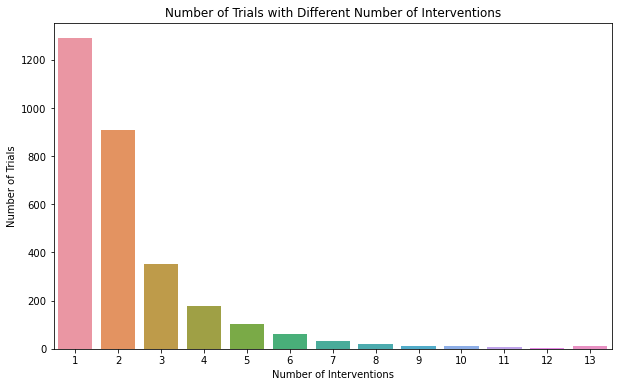

In [136]:
#Display the number of trials with each number of interventions on a bar plot
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Interventions Count', y = 'Number of Trials', data = breastInterventionsCount)
plt.title('Number of Trials with Different Number of Interventions')
plt.xlabel('Number of Interventions')
plt.ylabel('Number of Trials')
plt.show()




In [164]:
#Let's recreate that for the covid dataset
covidInterventions = covidDF.copy()
covidInterventions = covidInterventions[['NCT Number', 'Status', 'Conditions', 'Interventions']]
covidInterventions.head()


,NCT Number,Status,Conditions,Interventions
0,NCT04446377,COMPLETED,COVID-19 Disease,DRUG: Apilimod Dimesylate Capsule|OTHER: Placebo
1,NCT05508477,RECRUITING,COVID-19 Pandemic|COVID-19 Vaccines,BIOLOGICAL: Vaksin Merah Putih - UA SARS-CoV-2...
2,NCT04472494,TERMINATED,COVID-19|SARS-CoV-2,BIOLOGICAL: Abatacept|OTHER: Placebo
3,NCT04720794,COMPLETED,Covid19|SARS (Severe Acute Respiratory Syndrom...,DEVICE: Lucira COVID-19 All-In-One test kit
4,NCT04598594,COMPLETED,Covid19|SARS-Associated Coronavirus as Cause o...,"DRUG: Patch, Nicotine|DRUG: Patch, Placebo"


In [165]:
covidInterventions
#Get the type of the 'Interventions' column
type(covidInterventions['Interventions'][0])
#The intentions are delimited by '|'. For each trial, split the interventions and create a and replace the one string with a list of the delimted values. I will also create a new column that counts the number of interventions for each trial.
covidInterventions['Interventions'] = covidInterventions['Interventions'].str.split('|')
covidInterventions

,NCT Number,Status,Conditions,Interventions
0,NCT04446377,COMPLETED,COVID-19 Disease,"[DRUG: Apilimod Dimesylate Capsule, OTHER: Pla..."
1,NCT05508477,RECRUITING,COVID-19 Pandemic|COVID-19 Vaccines,[BIOLOGICAL: Vaksin Merah Putih - UA SARS-CoV-...
2,NCT04472494,TERMINATED,COVID-19|SARS-CoV-2,"[BIOLOGICAL: Abatacept, OTHER: Placebo]"
3,NCT04720794,COMPLETED,Covid19|SARS (Severe Acute Respiratory Syndrom...,[DEVICE: Lucira COVID-19 All-In-One test kit]
4,NCT04598594,COMPLETED,Covid19|SARS-Associated Coronavirus as Cause o...,"[DRUG: Patch, Nicotine, DRUG: Patch, Placebo]"
...,...,...,...,...
2617,NCT04447235,TERMINATED,Cancer|COVID|Coronavirus Infection,"[DRUG: Placebo, DRUG: Ivermectin, DRUG: Losartan]"
2618,NCT04555096,TERMINATED,Covid19|SARS-CoV-2 Infection,"[DRUG: GC4419, DRUG: Placebo]"
2619,NCT04672395,COMPLETED,COVID-19,[BIOLOGICAL: CpG 1018/Alum-adjuvanted SCB-2019...
2620,NCT05162495,UNKNOWN,COVID-19,[DEVICE: BioStation T101 and TeraTube]


In [ ]:
#Get the unique values of the 'Interventions' column
covidInterventions['Interventions'].unique()

In [139]:
#Create a dataframe where the first column is the number of interventions and the second column is the number of trials with that number of interventions
covidInterventionsCount = covidInterventions['Interventions Count'].value_counts().reset_index()
covidInterventionsCount.columns = ['Interventions Count', 'Number of Trials']
covidInterventionsCount = covidInterventionsCount.sort_values(by = 'Interventions Count')
covidInterventionsCount
#Recreate that, but if there are more than 13 interventions, then put them in the 13+ category
covidInterventions['Interventions Count'] = covidInterventions['Interventions Count'].apply(lambda x: x if x <= 13 else 13)
covidInterventionsCount = covidInterventions['Interventions Count'].value_counts().reset_index()
covidInterventionsCount.columns = ['Interventions Count', 'Number of Trials']
covidInterventionsCount = covidInterventionsCount.sort_values(by = 'Interventions Count')
covidInterventionsCount


,Interventions Count,Number of Trials
0,1,1126
1,2,801
2,3,306
3,4,148
4,5,93
5,6,56
6,7,31
7,8,17
9,9,11
10,10,8


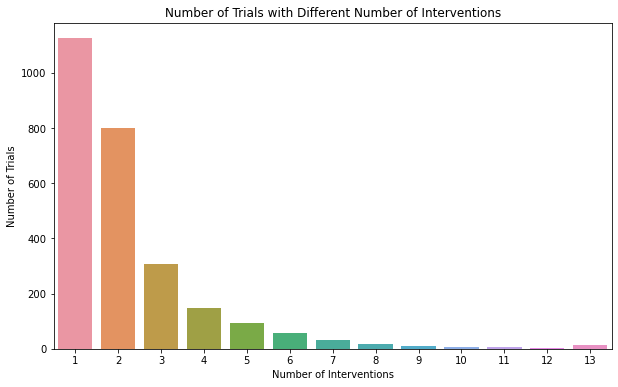

In [140]:
#Display the number of trials with each number of interventions on a bar plot. Display the count of each bar on the plot
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Interventions Count', y = 'Number of Trials', data = covidInterventionsCount)
plt.title('Number of Trials with Different Number of Interventions')
plt.xlabel('Number of Interventions')
plt.ylabel('Number of Trials')
plt.show()



In [141]:
#Join the two dataframes together and display on a bar graph, with the number of studies for breast cancer in pink, and covid in blue
breastInterventionsCount['Condition'] = 'Breast Cancer'
covidInterventionsCount['Condition'] = 'Covid'
interventionsCount = pd.concat([breastInterventionsCount, covidInterventionsCount])
interventionsCount

,Interventions Count,Number of Trials,Condition
0,1,1290,Breast Cancer
1,2,908,Breast Cancer
2,3,354,Breast Cancer
3,4,177,Breast Cancer
4,5,102,Breast Cancer
5,6,63,Breast Cancer
6,7,34,Breast Cancer
7,8,19,Breast Cancer
9,9,12,Breast Cancer
10,10,10,Breast Cancer


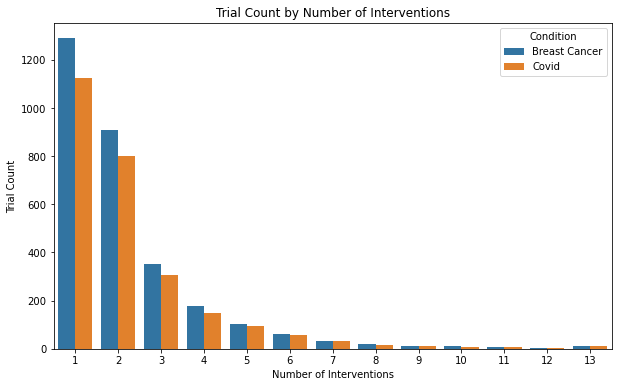

In [142]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Interventions Count', y = 'Number of Trials', data = interventionsCount, hue = 'Condition')
plt.title('Trial Count by Number of Interventions')
plt.xlabel('Number of Interventions')
plt.ylabel('Trial Count')
plt.show()


In [143]:
#Now let's do some analysis about the type of the intervention that's being used. Let's see what the most common interventions are for each dataset
#From breastInterventions, create a dictionary of all interventions and their counts
breastInterventionsDict = {}
for interventions in breastInterventions['Interventions']:
    for intervention in interventions:
        if intervention in breastInterventionsDict:
            breastInterventionsDict[intervention] += 1
        else:
            breastInterventionsDict[intervention] = 1
breastInterventionsDict = pd.DataFrame(list(breastInterventionsDict.items()), columns = ['Intervention', 'Count'])
breastInterventionsDict = breastInterventionsDict.sort_values(by = 'Count', ascending = False)  
breastInterventionsDict.head()


,Intervention,Count
38,DRUG: Fulvestrant,81
62,OTHER: Questionnaire Administration,71
29,DRUG: Paclitaxel,71
28,DRUG: Cyclophosphamide,68
111,DRUG: Trastuzumab,63


In [144]:
#Split intervention into intervention type (before the space) and intervention name (after the space)
breastInterventionsDict['Intervention Type'] = breastInterventionsDict['Intervention'].apply(lambda x: x.split(' ')[0])
breastInterventionsDict['Intervention Name'] = breastInterventionsDict['Intervention'].apply(lambda x: x.split(' ')[1])
breastInterventionsDict.head()
#Drop the rows where the count is less than 10
breastInterventionsDict = breastInterventionsDict[~(breastInterventionsDict['Count'] < 10)]
breastInterventionsDict.head(15)

,Intervention,Count,Intervention Type,Intervention Name
38,DRUG: Fulvestrant,81,DRUG:,Fulvestrant
62,OTHER: Questionnaire Administration,71,OTHER:,Questionnaire
29,DRUG: Paclitaxel,71,DRUG:,Paclitaxel
28,DRUG: Cyclophosphamide,68,DRUG:,Cyclophosphamide
111,DRUG: Trastuzumab,63,DRUG:,Trastuzumab
71,DRUG: Carboplatin,59,DRUG:,Carboplatin
75,DRUG: Pembrolizumab,59,DRUG:,Pembrolizumab
242,DRUG: Abemaciclib,53,DRUG:,Abemaciclib
21,DRUG: Capecitabine,51,DRUG:,Capecitabine
4,PROCEDURE: Biospecimen Collection,50,PROCEDURE:,Biospecimen


In [145]:
#Now that we have a more manageable list, let's plot this data in 3 ways to see which is the nicest. Let's plot the 20 most common interventions when the type is 'Drug'
#Create a dataframe that only contains the interventions where the type is 'Drug'
breastInterventionsDictDrug = breastInterventionsDict[breastInterventionsDict['Intervention Type'] == 'DRUG:']
breastInterventionsDictDrug.head(20)



,Intervention,Count,Intervention Type,Intervention Name
38,DRUG: Fulvestrant,81,DRUG:,Fulvestrant
29,DRUG: Paclitaxel,71,DRUG:,Paclitaxel
28,DRUG: Cyclophosphamide,68,DRUG:,Cyclophosphamide
111,DRUG: Trastuzumab,63,DRUG:,Trastuzumab
71,DRUG: Carboplatin,59,DRUG:,Carboplatin
75,DRUG: Pembrolizumab,59,DRUG:,Pembrolizumab
242,DRUG: Abemaciclib,53,DRUG:,Abemaciclib
21,DRUG: Capecitabine,51,DRUG:,Capecitabine
54,DRUG: Placebo,46,DRUG:,Placebo
113,DRUG: Letrozole,45,DRUG:,Letrozole


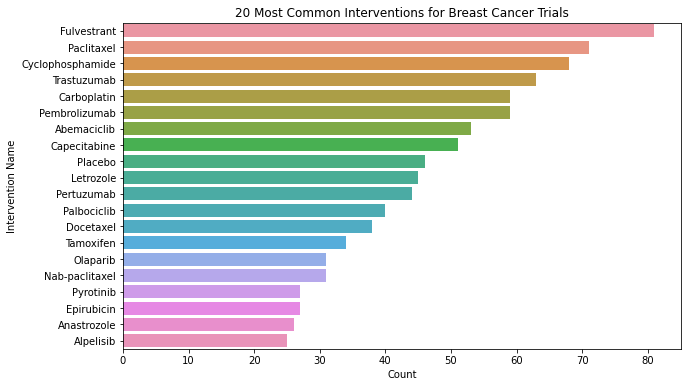

In [146]:
#First, a bar plot
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Count', y = 'Intervention Name', data = breastInterventionsDictDrug.head(20))  
plt.title('20 Most Common Interventions for Breast Cancer Trials')
plt.xlabel('Count')
plt.ylabel('Intervention Name')
plt.show()

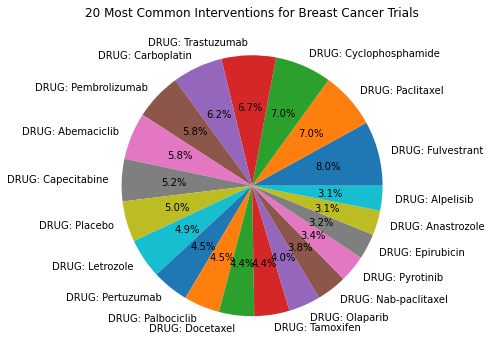

In [147]:
#The next plot will be a pie chart

plt.figure(figsize = (10, 6), facecolor='white')
plt.pie(breastInterventionsDict['Count'].head(20), labels = breastInterventionsDictDrug['Intervention'].head(20), autopct='%1.1f%%')
plt.title('20 Most Common Interventions for Breast Cancer Trials')
plt.show()


In [166]:
covidInterventions

,NCT Number,Status,Conditions,Interventions
0,NCT04446377,COMPLETED,COVID-19 Disease,"[DRUG: Apilimod Dimesylate Capsule, OTHER: Pla..."
1,NCT05508477,RECRUITING,COVID-19 Pandemic|COVID-19 Vaccines,[BIOLOGICAL: Vaksin Merah Putih - UA SARS-CoV-...
2,NCT04472494,TERMINATED,COVID-19|SARS-CoV-2,"[BIOLOGICAL: Abatacept, OTHER: Placebo]"
3,NCT04720794,COMPLETED,Covid19|SARS (Severe Acute Respiratory Syndrom...,[DEVICE: Lucira COVID-19 All-In-One test kit]
4,NCT04598594,COMPLETED,Covid19|SARS-Associated Coronavirus as Cause o...,"[DRUG: Patch, Nicotine, DRUG: Patch, Placebo]"
...,...,...,...,...
2617,NCT04447235,TERMINATED,Cancer|COVID|Coronavirus Infection,"[DRUG: Placebo, DRUG: Ivermectin, DRUG: Losartan]"
2618,NCT04555096,TERMINATED,Covid19|SARS-CoV-2 Infection,"[DRUG: GC4419, DRUG: Placebo]"
2619,NCT04672395,COMPLETED,COVID-19,[BIOLOGICAL: CpG 1018/Alum-adjuvanted SCB-2019...
2620,NCT05162495,UNKNOWN,COVID-19,[DEVICE: BioStation T101 and TeraTube]


In [168]:
#From covidInterventions, create a dictionary of all interventions and their counts
covidInterventionsDict = {}
for interventions in covidInterventions['Interventions']:
    for intervention in interventions:
        if intervention in covidInterventionsDict:
            covidInterventionsDict[intervention] += 1
        else:
            covidInterventionsDict[intervention] = 1
covidInterventionsDict = pd.DataFrame(list(covidInterventionsDict.items()), columns = ['Intervention', 'Count'])
covidInterventionsDict = covidInterventionsDict.sort_values(by = 'Count', ascending = False)
covidInterventionsDict.head(10)


,Intervention,Count
16,DRUG: Placebo,267
1,OTHER: Placebo,157
87,BIOLOGICAL: Placebo,90
72,DRUG: Hydroxychloroquine,59
387,DRUG: Ivermectin,26
80,DRUG: Azithromycin,25
38,DRUG: Remdesivir,22
129,DRUG: Placebo oral tablet,21
86,BIOLOGICAL: mRNA-1273,20
143,BIOLOGICAL: BNT162b2,20


In [169]:
#create a dataframe that only contains the interventions where the type is 'Drug'. Split intervention into intervention type (before the space) and intervention name (after the space)
covidInterventionsDict['Intervention Type'] = covidInterventionsDict['Intervention'].apply(lambda x: x.split(' ')[0])
covidInterventionsDict['Intervention Name'] = covidInterventionsDict['Intervention'].apply(lambda x: x.split(' ')[1])
covidInterventionsDict.head()

,Intervention,Count,Intervention Type,Intervention Name
16,DRUG: Placebo,267,DRUG:,Placebo
1,OTHER: Placebo,157,OTHER:,Placebo
87,BIOLOGICAL: Placebo,90,BIOLOGICAL:,Placebo
72,DRUG: Hydroxychloroquine,59,DRUG:,Hydroxychloroquine
387,DRUG: Ivermectin,26,DRUG:,Ivermectin


In [173]:
#Create a df that only contains the interventions where the type is 'Drug'
covidInterventionsDictDrug = covidInterventionsDict[covidInterventionsDict['Intervention Type'] == 'DRUG:']
covidInterventionsDictDrug.head(20)
#drop the placebo intervention name
covidInterventionsDictDrug = covidInterventionsDictDrug[~(covidInterventionsDictDrug['Intervention Name'] == 'Placebo')]

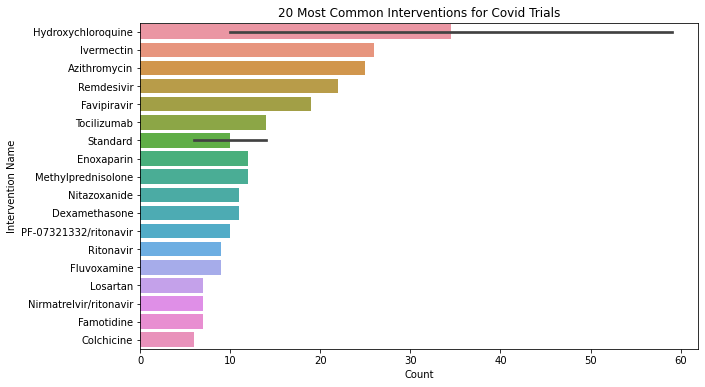

In [174]:
#First, a bar plot
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Count', y = 'Intervention Name', data = covidInterventionsDictDrug.head(20))
plt.title('20 Most Common Interventions for Covid Trials')
plt.xlabel('Count')
plt.ylabel('Intervention Name')
plt.show()
